In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
Titanic_train_data = pd.read_csv('Titanic_train.csv')
Titanic_test_data = pd.read_csv('Titanic_test.csv')

In [ ]:
print("Titanic train data......")
print(Titanic_train_data.head())
print("Titanic test data .......")
print(Titanic_test_data.head())

Titanic train data......
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [ ]:
print("Titanic train data......")
print(Titanic_train_data.info())
print("Titanic test data .......")
print(Titanic_test_data.info())

Titanic train data......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Titanic test data .......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [ ]:
print(Titanic_train_data.shape)

(891, 12)


Histogram for the Age


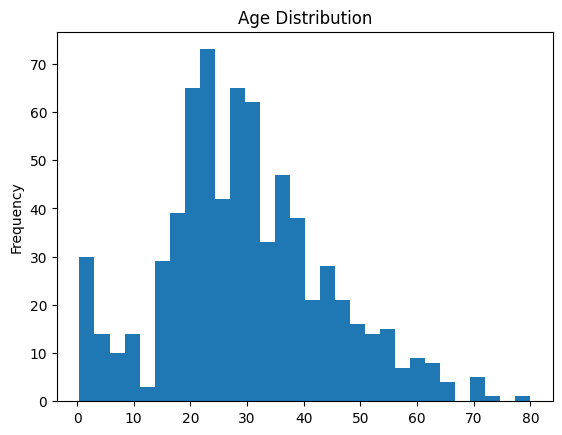

Boxplot for the Fare vs Pclass


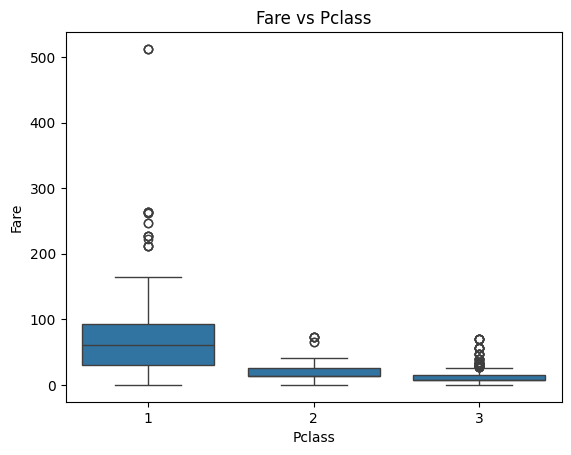

Countplot for the number of male and female


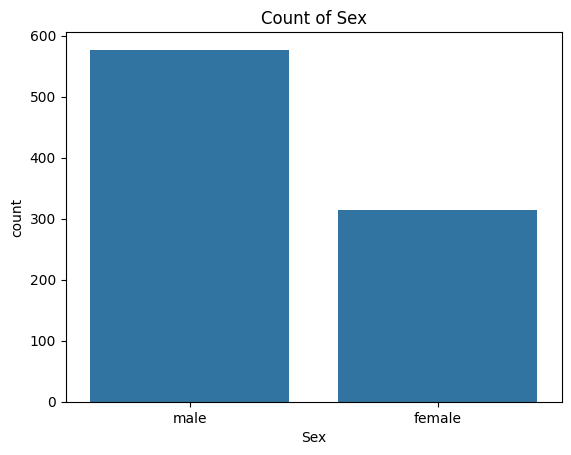

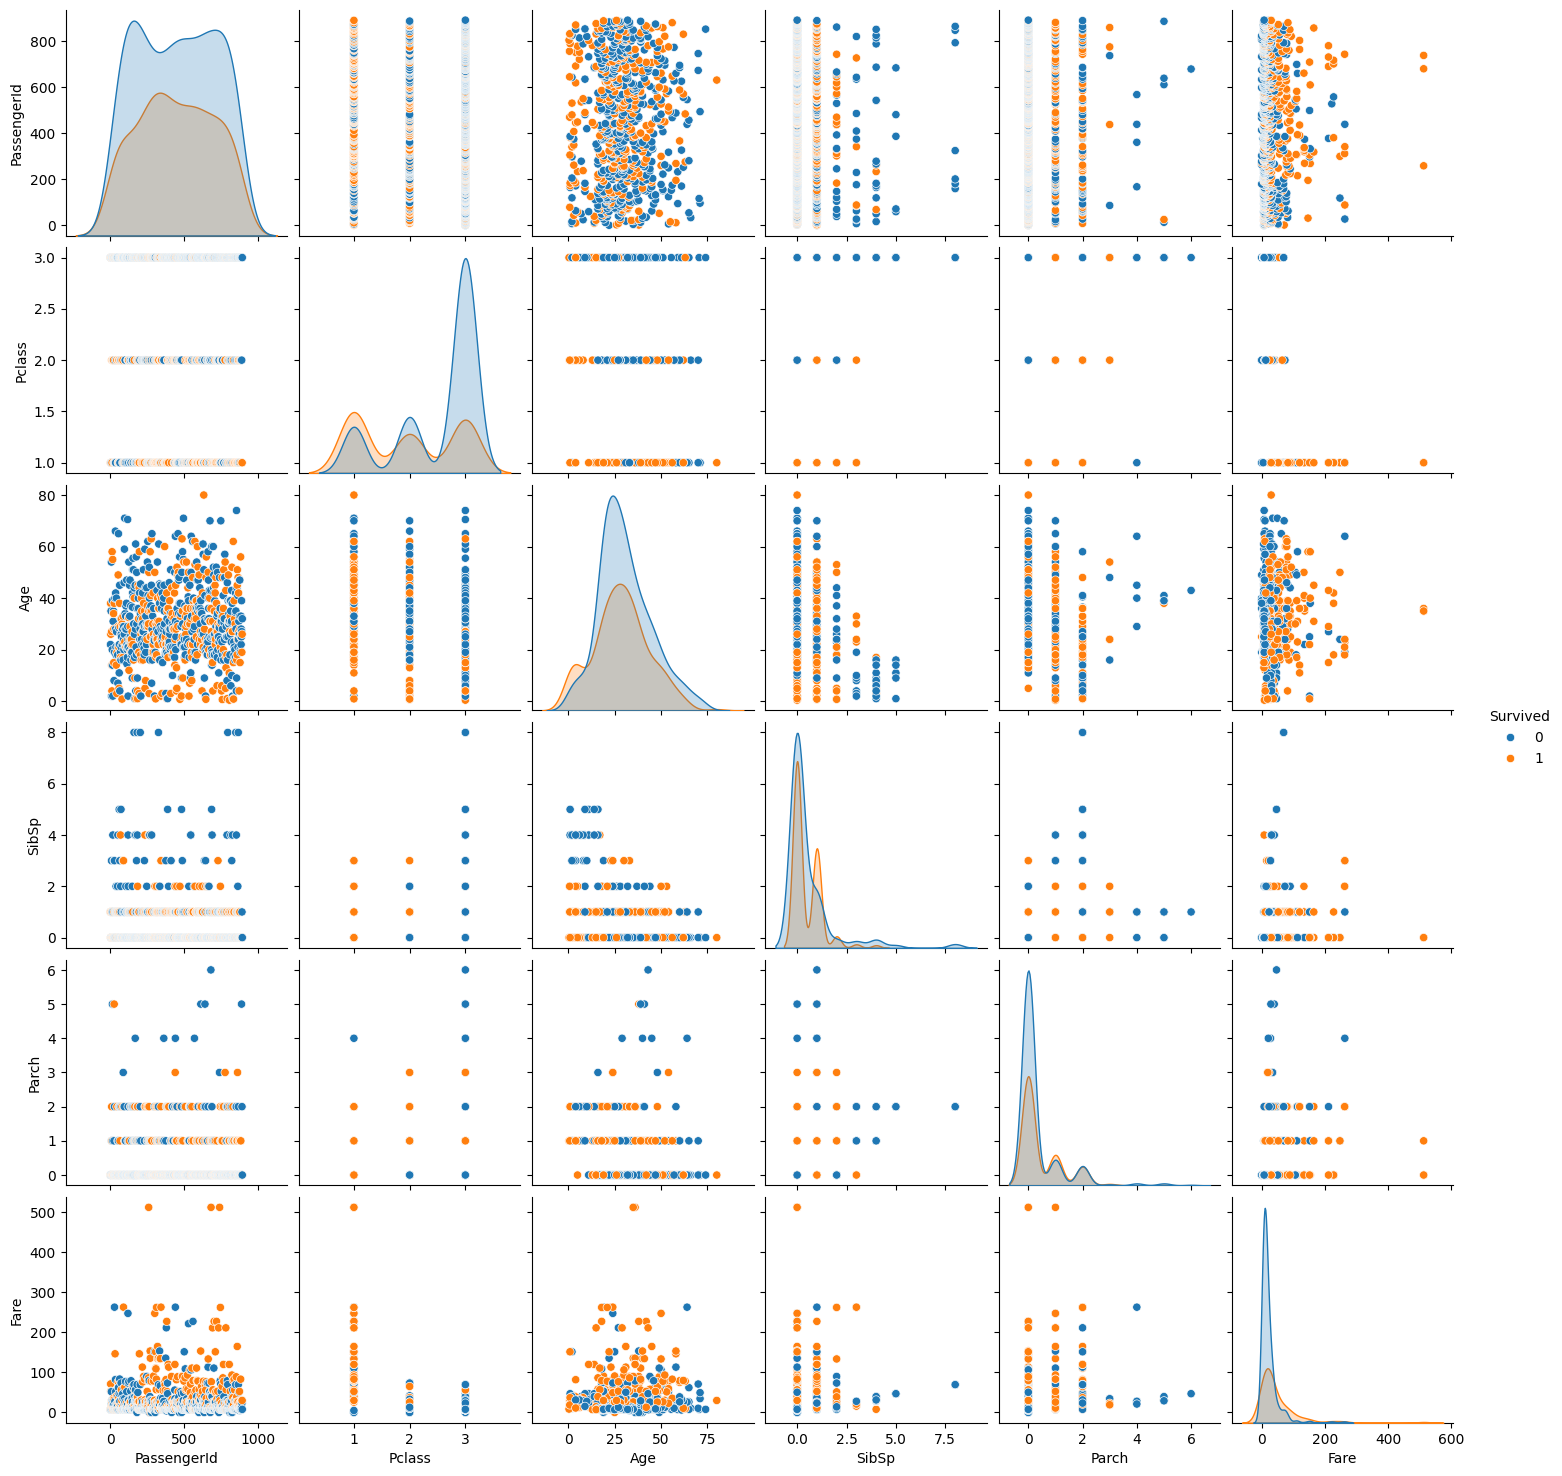

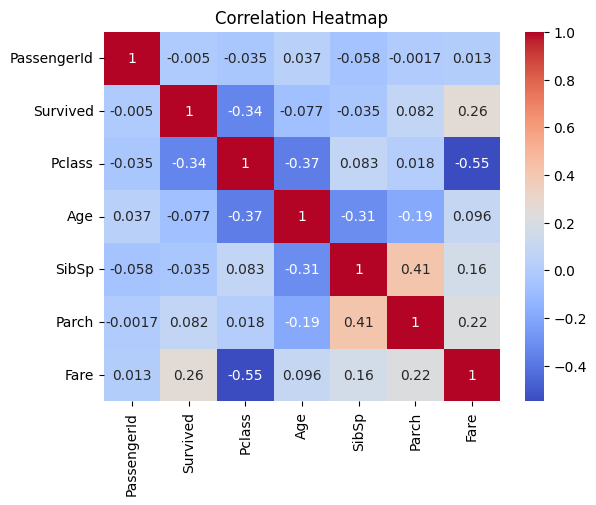

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
Titanic_train_data['Age'].plot(kind='hist', bins=30)
print("Histogram for the Age")
plt.title('Age Distribution')
plt.show()

# Boxplot
sns.boxplot(x='Pclass', y='Fare', data=Titanic_train_data)
print("Boxplot for the Fare vs Pclass")
plt.title('Fare vs Pclass')
plt.show()

# Countplot
sns.countplot(x='Sex', data=Titanic_train_data)
print("Countplot for the number of male and female")
plt.title('Count of Sex')
plt.show()

# Pairplot
sns.pairplot(Titanic_train_data, hue='Survived')
plt.show()

# Select only numeric columns
numeric_data = Titanic_train_data.select_dtypes(include=['number'])

# Now correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Now we are droping the PassengerId, Name, Ticket ,cabin from the train dataset and test dataset
# Drop 'PassengerId', 'Name', 'Ticket', 'Cabin' columns
Titanic_train_data = Titanic_train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
Titanic_test_data = Titanic_test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


In [ ]:
# Fill missing Age with median
Titanic_train_data['Age'] = Titanic_train_data['Age'].fillna(Titanic_train_data['Age'].median())
Titanic_test_data['Age'] = Titanic_test_data['Age'].fillna(Titanic_test_data['Age'].median())
# Fill missing Embarked with mode
Titanic_train_data['Embarked'] = Titanic_train_data['Embarked'].fillna(Titanic_train_data['Embarked'].mode()[0])
Titanic_test_data['Embarked'] = Titanic_test_data['Embarked'].fillna(Titanic_test_data['Embarked'].mode()[0])

# Fill missing Fare (only in test data)
Titanic_test_data['Fare'] = Titanic_test_data['Fare'].fillna(Titanic_test_data['Fare'].median())

# Check again for missing values
print("Missing values after handling (train):\n", Titanic_train_data.isnull().sum())
print("\nMissing values after handling (test):\n", Titanic_test_data.isnull().sum())

Missing values after handling (train):
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values after handling (test):
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
# Encode 'Sex': male=0, female=1
Titanic_train_data['Sex'] = Titanic_train_data['Sex'].map({'male': 0, 'female': 1})
Titanic_test_data['Sex'] = Titanic_test_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
Titanic_train_data = pd.get_dummies(Titanic_train_data, columns=['Embarked'], drop_first=True)
Titanic_test_data = pd.get_dummies(Titanic_test_data, columns=['Embarked'], drop_first=True)

# To make sure train and test have same columns
Titanic_test_data['Embarked_Q'] = Titanic_test_data.get('Embarked_Q', 0)
Titanic_test_data['Embarked_S'] = Titanic_test_data.get('Embarked_S', 0)


In [ ]:
# Separate X and y
X = Titanic_train_data.drop('Survived', axis=1)
y = Titanic_train_data['Survived']

# Test data (no Survived column)
X_test = Titanic_test_data.copy()


In [ ]:
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, roc_curve)

In [ ]:
# Split train data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (712, 8)
Validation set shape: (179, 8)


In [ ]:
# Build Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8824967824967825

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



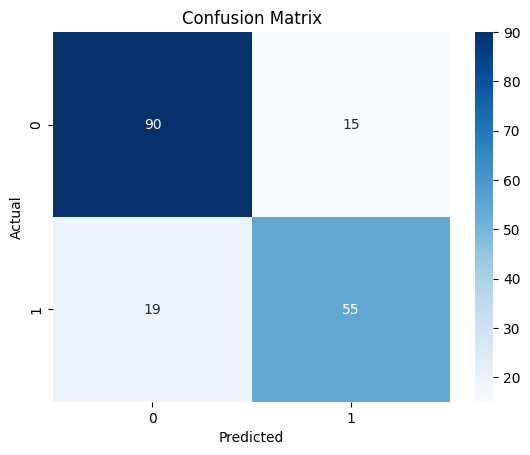

In [ ]:
# Predictions
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_prob))

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


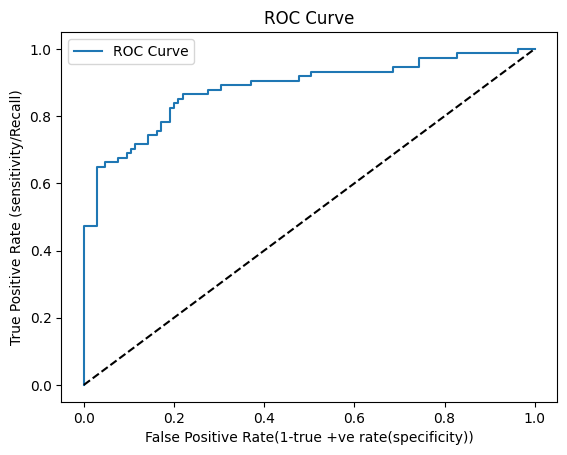

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')  # Random chance line
plt.xlabel("False Positive Rate(1-true +ve rate(specificity))")
plt.ylabel("True Positive Rate (sensitivity/Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Coefficients Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
1         Sex     2.591222
5        Fare     0.002576
2         Age    -0.030574
4       Parch    -0.107848
6  Embarked_Q    -0.111981
3       SibSp    -0.295062
7  Embarked_S    -0.400561
0      Pclass    -0.938047


Positive Coefficient ➔ Higher survival probability

Negative Coefficient ➔ Lower survival probability

Example: If Sex has a big positive coefficient, it means being female increases survival.

In [ ]:
# Separate features (X_test) from test dataset (no 'Survived' column in the test set)
X_test_final = Titanic_test_data.copy()

In [ ]:
# Predict survival probabilities and the actual class (Survived/Not Survived)
y_test_pred = model.predict(X_test_final)
print('Survived is predict on the  test data set ', y_test_pred)
y_test_prob = model.predict_proba(X_test_final)[:, 1]  # Probability of survival (class 1)


Survived is predict on the  test data set  [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
# Add the 'Survived' column to the test dataset with predictions
Titanic_test_data['Survived'] = y_test_pred

# Display the first few rows to check
print(Titanic_test_data.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Survived
0       3    0  34.5      0      0   7.8292        True       False         0
1       3    1  47.0      1      0   7.0000       False        True         0
2       2    0  62.0      0      0   9.6875        True       False         0
3       3    0  27.0      0      0   8.6625       False        True         0
4       3    1  22.0      1      1  12.2875       False        True         1


In [ ]:
import pickle

# Save the trained model to a file using pickle
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(model, f)







i have make the dump the model and using the pickle and worked offline for the streamlit

the colab link for the streamlit deploy locally : https://colab.research.google.com/drive/1XLRIFz_x-NKHL_qKSVZlcpCjtEo-EIHV



the below part is another logistic regesiion code without using the train test split for the logistic regression .

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
titanic = pd.read_csv('/content/Titanic_train.csv')
titanic.head()
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic['Sex'] = titanic['Sex'].map({ 'male' : 0 , 'female' : 1 })


titanic= pd.get_dummies(titanic, columns=['Embarked'], drop_first= True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [ ]:
X = titanic.iloc[:,1:]
Y = titanic.iloc[:,0]
X1 = X.copy()
Y1 = Y.copy()

In [ ]:
print("X value")
print(X.head())
print("Y Value")
print(Y.head())

X value
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True
Y Value
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#now i am using the test data for the prediction for the new data
test = pd.read_csv('/content/Titanic_test.csv')
test = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
test['Sex'] = test['Sex'].map({ 'male' : 0 , 'female' : 1 })
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,27.0,0,0,8.0500,S


In [ ]:
test= pd.get_dummies(test, columns=['Embarked'], drop_first= True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,True,False
1,3,1,47.0,1,0,7.0000,False,True
2,2,0,62.0,0,0,9.6875,True,False
3,3,0,27.0,0,0,8.6625,False,True
4,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,False,True
414,1,1,39.0,0,0,108.9000,False,False
415,3,0,38.5,0,0,7.2500,False,True
416,3,0,27.0,0,0,8.0500,False,True


In [ ]:
# i am getting the ouptput for the titanic_test_dataset on the model which is trained on the titanic_train_dataset
y_predict_test = classifier.predict(test)
y_predict_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Here i am making the predicition of the model using the trained data


In [ ]:
y_pred = classifier.predict(X)

In [ ]:
y_pred_df = pd.DataFrame({
    'Actual':Y,
    'Predicted':y_pred
})

In [ ]:
print(y_pred_df.to_string())

     Actual  Predicted
0         0          0
1         1          1
2         1          1
3         1          1
4         0          0
5         0          0
6         0          0
7         0          0
8         1          1
9         1          1
10        1          1
11        1          1
12        0          0
13        0          0
14        0          1
15        1          1
16        0          0
17        1          0
18        0          0
19        1          1
20        0          0
21        1          0
22        1          1
23        1          0
24        0          1
25        1          0
26        0          0
27        0          0
28        1          1
29        0          0
30        0          0
31        1          1
32        1          1
33        0          0
34        0          1
35        0          0
36        1          0
37        0          0
38        0          1
39        1          1
40        0          0
41        0          1
42        0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,y_pred)

array([[475,  74],
       [103, 239]])

In [ ]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



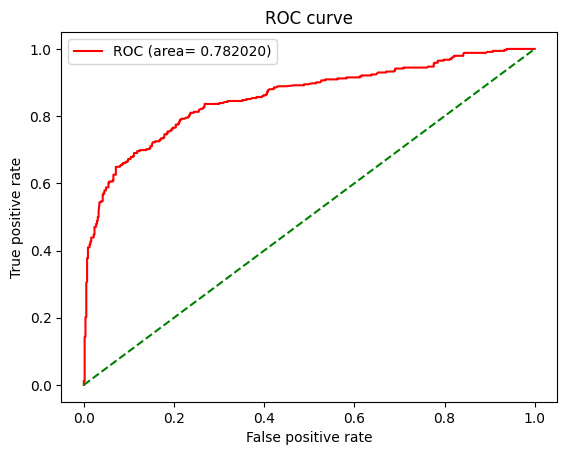

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='ROC (area= %2f)'%auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
auc

np.float64(0.7820199405617869)

In [ ]:
import statsmodels.api as sm

In [ ]:
X1['Embarked_Q'] = X1['Embarked_Q'].astype(int)
X1['Embarked_S'] = X1['Embarked_S'].astype(int)


In [ ]:
sm.Logit(Y,X1).fit().summary()

Optimization terminated successfully.
         Current function value: 0.454477
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.3175
Time:                        12:41:45   Log-Likelihood:                -404.94
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.268e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5438      0.089     -6.118      0.000      -0.718      -0.370
Sex            2.7525      0.193     14.236      0.000       2.374       3.131
Age           -0.0148      0.006     -2.552      0.011      -0.026      -0.003
SibSp         -0.3107      0.103     -3.002      0.003      -0.514      -0.108
Parch         -0.1369      0.115     -1.195      0.232      -0.361       0.088
Fare           0.0090      0.003      3.447      0.001       0.004       0.014
Embarked_Q     0.0609      0.377      0.161      0.872      -0.679       0.801
Embarked_S    -0.0317      0.224     -0.142      0.887      -0.471       0.407
==============================================================================
"""

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

0.8013468013468014